In [1]:
import read_lammps_dump2
import os
import numpy as np
import pickle
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

from sklearn.neighbors import NearestNeighbors

import networkx as nx

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow

%matplotlib inline

In [183]:
trj_fn = './15Na10Ca37B38Si/dump.quench.lammpstrj'
trj_fn = './15Na10Ca12B63Si/dump.quench.lammpstrj'
trj_fn = './dcd_37B38Si/dump.quench.lammpstrj'
dcd_pk = './dcd_37B38Si/Si_0.pkl'
# os.listdir()
['dcd_12B63Si', 'dcd_24B51Si', 'dcd_37B38Si', 'dcd_50B25Si', 'dcd_62B13Si',\
 'dcd_6B69Si', 'dcd_75Si']

['.DS_Store',
 '.ipynb_checkpoints',
 '.ipynb_checkpoints (tzhang4@buffalo.edu)',
 '15Na10Ca12B63Si',
 '15Na10Ca24B51Si',
 '15Na10Ca37B38Si',
 '15Na10Ca50B25Si',
 '15Na10Ca62B13Si',
 '15Na10Ca6B69Si',
 '15Na10Ca75B',
 '15Na10Ca75Si',
 '__pycache__',
 'dcd_12B63Si',
 'dcd_24B51Si',
 'dcd_37B38Si',
 'dcd_50B25Si',
 'dcd_62B13Si',
 'dcd_6B69Si',
 'dcd_75B',
 'dcd_75Si',
 'MDAnalysis_scriptRD.ipynb',
 'plot_traj_test1.ipynb',
 'plot_traj_test1_RD.ipynb',
 'read_lammps_dump2.py',
 'Untitled.ipynb',
 'Untitled4.ipynb']

In [17]:
read_out_ele = read_lammps_dump2.read_lammps_atoms(trj_fn, element_to_read=['Si'], wrapped_out=True, scaled_out=False)

In [15]:
len(read_out_ele)

2

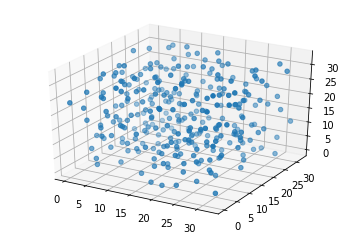

In [26]:

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(*np.array(read_out_ele[1]['Si'][-2]).T)

In [184]:
# with open('./dcd_37B38Si/Si_last.pkl', 'rb') as fp:
with open('./dcd_24B51Si/Si_last.pkl', 'rb') as fp:
    dat = pickle.load(fp)

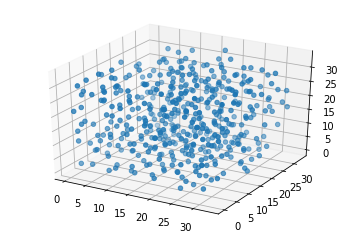

In [185]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(*dat.T)

In [186]:
# np.where(0<squareform(pdist(dat)))
nbrs = NearestNeighbors().fit(dat)
# nbrs.kneighbors_graph().toarray()
dists, indx = nbrs.kneighbors()#[0].flatten()
dist_std = dists.flatten().std()
dist_std

0.8514332761760971

In [224]:
ebch = []
ndd = 0
for idd, diss in zip(indx, dists):
    for iddd, disss in zip(idd, diss):
#         ebch.append((ndd, iddd, 1/disss))
        ebch.append((ndd, iddd, np.exp(-1*((disss**2)/(2*dist_std**2)))))
    ndd+=1
g = nx.Graph()
g.add_weighted_edges_from(ebunch_to_add=ebch)
# g.add_weighted_edges_from(ebunch_to_add=ebch)
# g = nx.from_numpy_array(nbrs.kneighbors_graph(mode='distance').toarray())
# nx.algorithms.centrality.betweenness_centrality(g)
# nx.algorithms.centrality.closeness_centrality(g)
ctlty = nx.algorithms.centrality.degree_centrality(g,)
edg_btwn = nx.algorithms.centrality.edge_betweenness_centrality(g)
# ebc

In [188]:
g.get_edge_data(237, 521)
# g.edges()

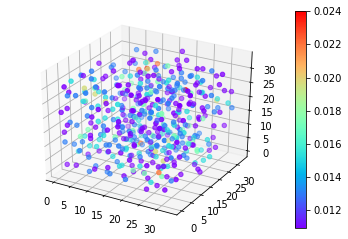

In [225]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ctlty_max = max(list(ctlty.values()))
ctlty_min = min(list(ctlty.values()))
xyzc = []
cls = []
for key, itm in ctlty.items():
#     print(key)
#     print(itm)
    xyzc.append(list(dat[key]))
#     cls.append([rainbow((itm-ctlty_min)/abs(ctlty_max-ctlty_min))])
#     cls.append(((itm-ctlty_min)/abs(ctlty_max-ctlty_min)))
    cls.append(itm)
# c=ax1.scatter(*dat[key], c=rainbow((itm-ctlty_min)/abs(ctlty_max-ctlty_min)))
mpb = ax1.scatter(*np.array(xyzc).T, c=cls, cmap=rainbow)
fig1.colorbar(mpb)

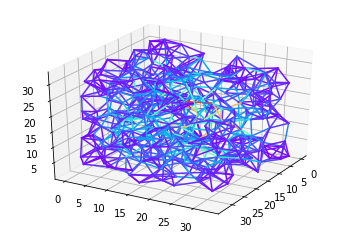

In [226]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ctlty_max = max(list(edg_btwn.values()))
ctlty_min = min(list(edg_btwn.values()))
for key, itm in edg_btwn.items():
    ax2.plot(*np.array([dat[key[0]], dat[key[1]]]).T, c=rainbow((itm-ctlty_min)/abs(ctlty_max-ctlty_min)))
ax2.view_init(30, 30)

(array([1.23e+03, 4.23e+02, 1.43e+02, 4.20e+01, 2.30e+01, 8.00e+00,
        5.00e+00, 2.00e+00, 2.00e+00, 1.00e+00]),
 array([5.04706387e-06, 4.01481467e-03, 8.02458227e-03, 1.20343499e-02,
        1.60441175e-02, 2.00538851e-02, 2.40636527e-02, 2.80734203e-02,
        3.20831879e-02, 3.60929555e-02, 4.01027231e-02]),
 <a list of 10 Patch objects>)

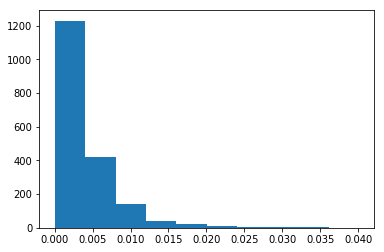

In [152]:
plt.hist(edg_btwn.values())

(array([80., 74., 73., 52., 41., 28., 26., 17., 18., 14.,  8.,  6.,  9.,
         5.,  3.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([3.50364220e-06, 3.02074643e-03, 6.03798923e-03, 9.05523202e-03,
        1.20724748e-02, 1.50897176e-02, 1.81069604e-02, 2.11242032e-02,
        2.41414460e-02, 2.71586888e-02, 3.01759316e-02, 3.31931744e-02,
        3.62104171e-02, 3.92276599e-02, 4.22449027e-02, 4.52621455e-02,
        4.82793883e-02, 5.12966311e-02, 5.43138739e-02, 5.73311167e-02,
        6.03483595e-02, 6.33656023e-02, 6.63828451e-02, 6.94000879e-02,
        7.24173306e-02, 7.54345734e-02, 7.84518162e-02, 8.14690590e-02,
        8.44863018e-02, 8.75035446e-02, 9.05207874e-02]),
 <a list of 30 Patch objects>)

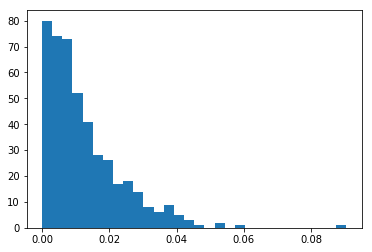

In [198]:
# plt.hist(nbrs.kneighbors()[0].flatten(), bins=30)
plt.hist(list(nx.algorithms.centrality.betweenness_centrality(g,).values()), bins=30)

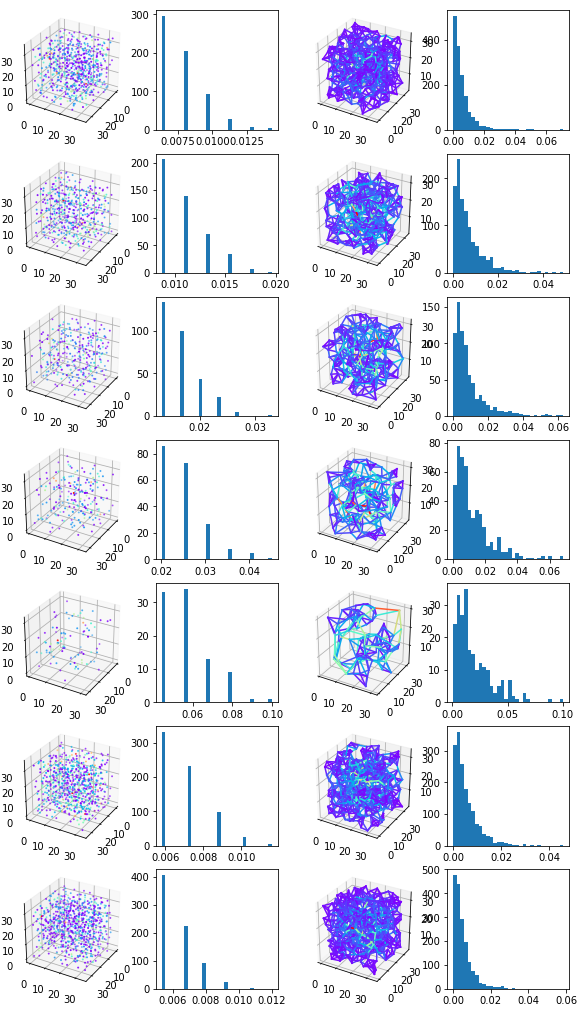

In [238]:
fig4 = plt.figure(figsize=(10,18))
sbplt=0
for fl in['dcd_12B63Si', 'dcd_24B51Si', 'dcd_37B38Si', 'dcd_50B25Si', 'dcd_62B13Si',\
 'dcd_6B69Si', 'dcd_75Si']:
    ax41 = fig4.add_subplot(7,4,sbplt+1, projection='3d')
    ax42 = fig4.add_subplot(7,4,sbplt+2)
    ax43 = fig4.add_subplot(7,4,sbplt+3, projection='3d')
    ax44 = fig4.add_subplot(7,4,sbplt+4)
    ax41.set_zlabel(fl.split('_')[1])
    ax41.view_init(30, 30)
    sbplt+=4
    
    with open('./'+fl+'/Si_last.pkl', 'rb') as fp:
        dat = pickle.load(fp)
    nbrs = NearestNeighbors(n_neighbors=4).fit(dat)
    dists, indx = nbrs.kneighbors()#[0].flatten()
    dist_std = dists.flatten().std()
    
    ebch = []
    ndd = 0
    for idd, diss in zip(indx, dists):
        for iddd, disss in zip(idd, diss):
    #         ebch.append((ndd, iddd, 1/disss))
            ebch.append((ndd, iddd, np.exp(-1*((disss**2)/(2*dist_std**2)))))
        ndd+=1
    g = nx.Graph()
    g.add_weighted_edges_from(ebunch_to_add=ebch)
    ctlty = nx.algorithms.centrality.degree_centrality(g)
    edg_btwn = nx.algorithms.centrality.edge_betweenness_centrality(g)
    
    xyzc = []
    cls = []
    for key, itm in ctlty.items():
        xyzc.append(list(dat[key]))
        cls.append(itm)
    mpb = ax41.scatter(*np.array(xyzc).T, c=cls, cmap=rainbow, s=1)
#     ax41.colorbar(mpb)

    ctlty_max = max(list(edg_btwn.values()))
    ctlty_min = min(list(edg_btwn.values()))
    for key, itm in edg_btwn.items():
        ax43.plot(*np.array([dat[key[0]], dat[key[1]]]).T, c=rainbow((itm-ctlty_min)/abs(ctlty_max-ctlty_min)))
    
    ax42.hist(ctlty.values(), bins=30)
    ax44.hist(edg_btwn.values(), bins=30)